In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from deepmip_dict import deepmip_dict

data_dir = '/Users/wb19586/Documents/coding_github/aprp_deepmip/ebm_output_data/'


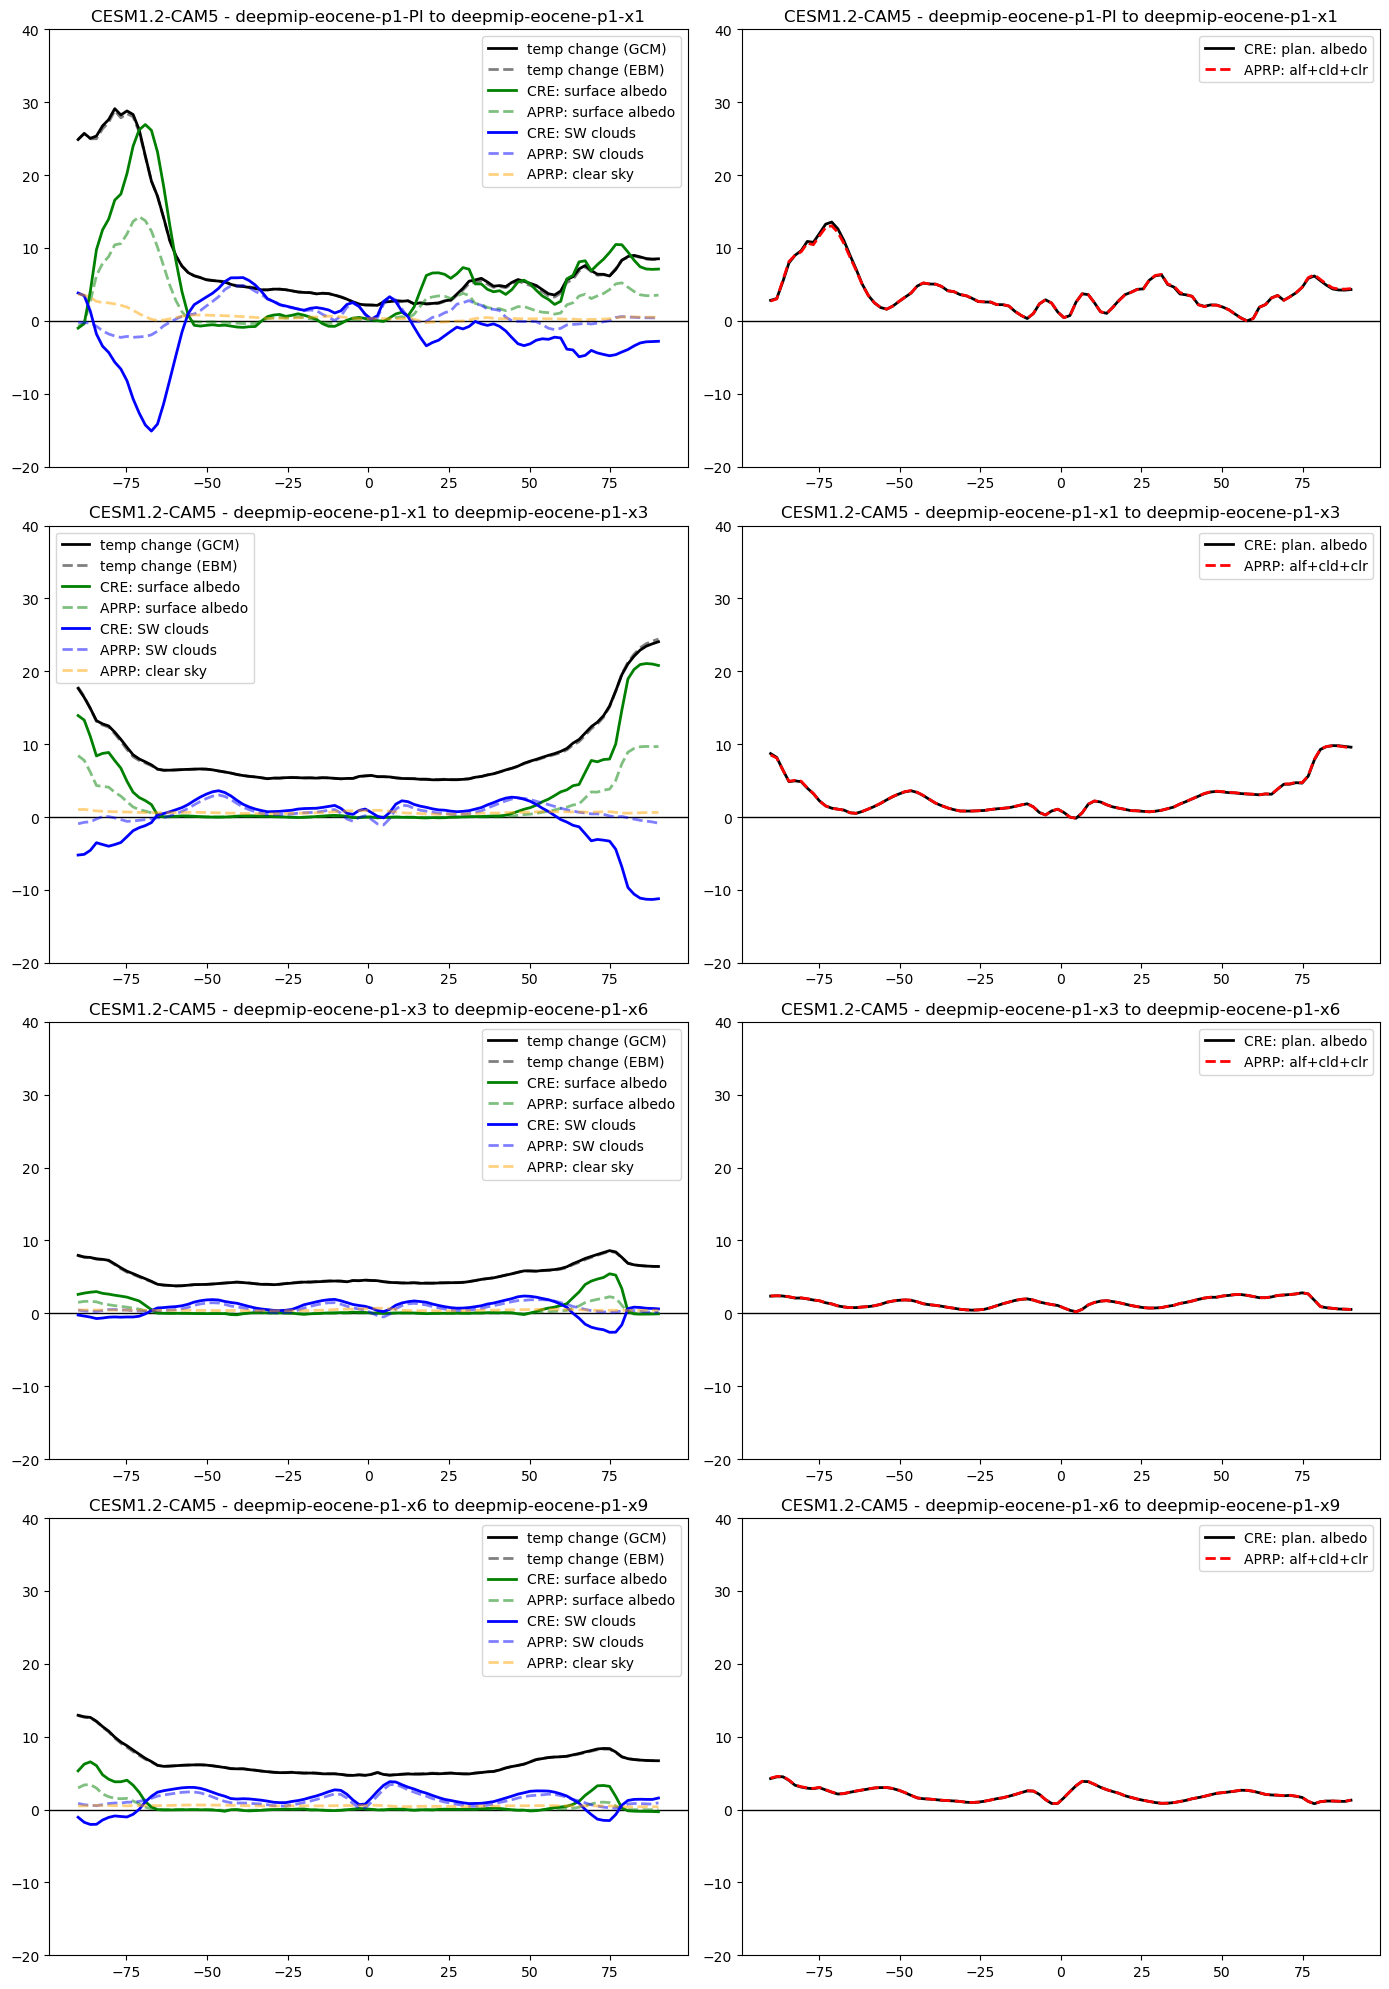

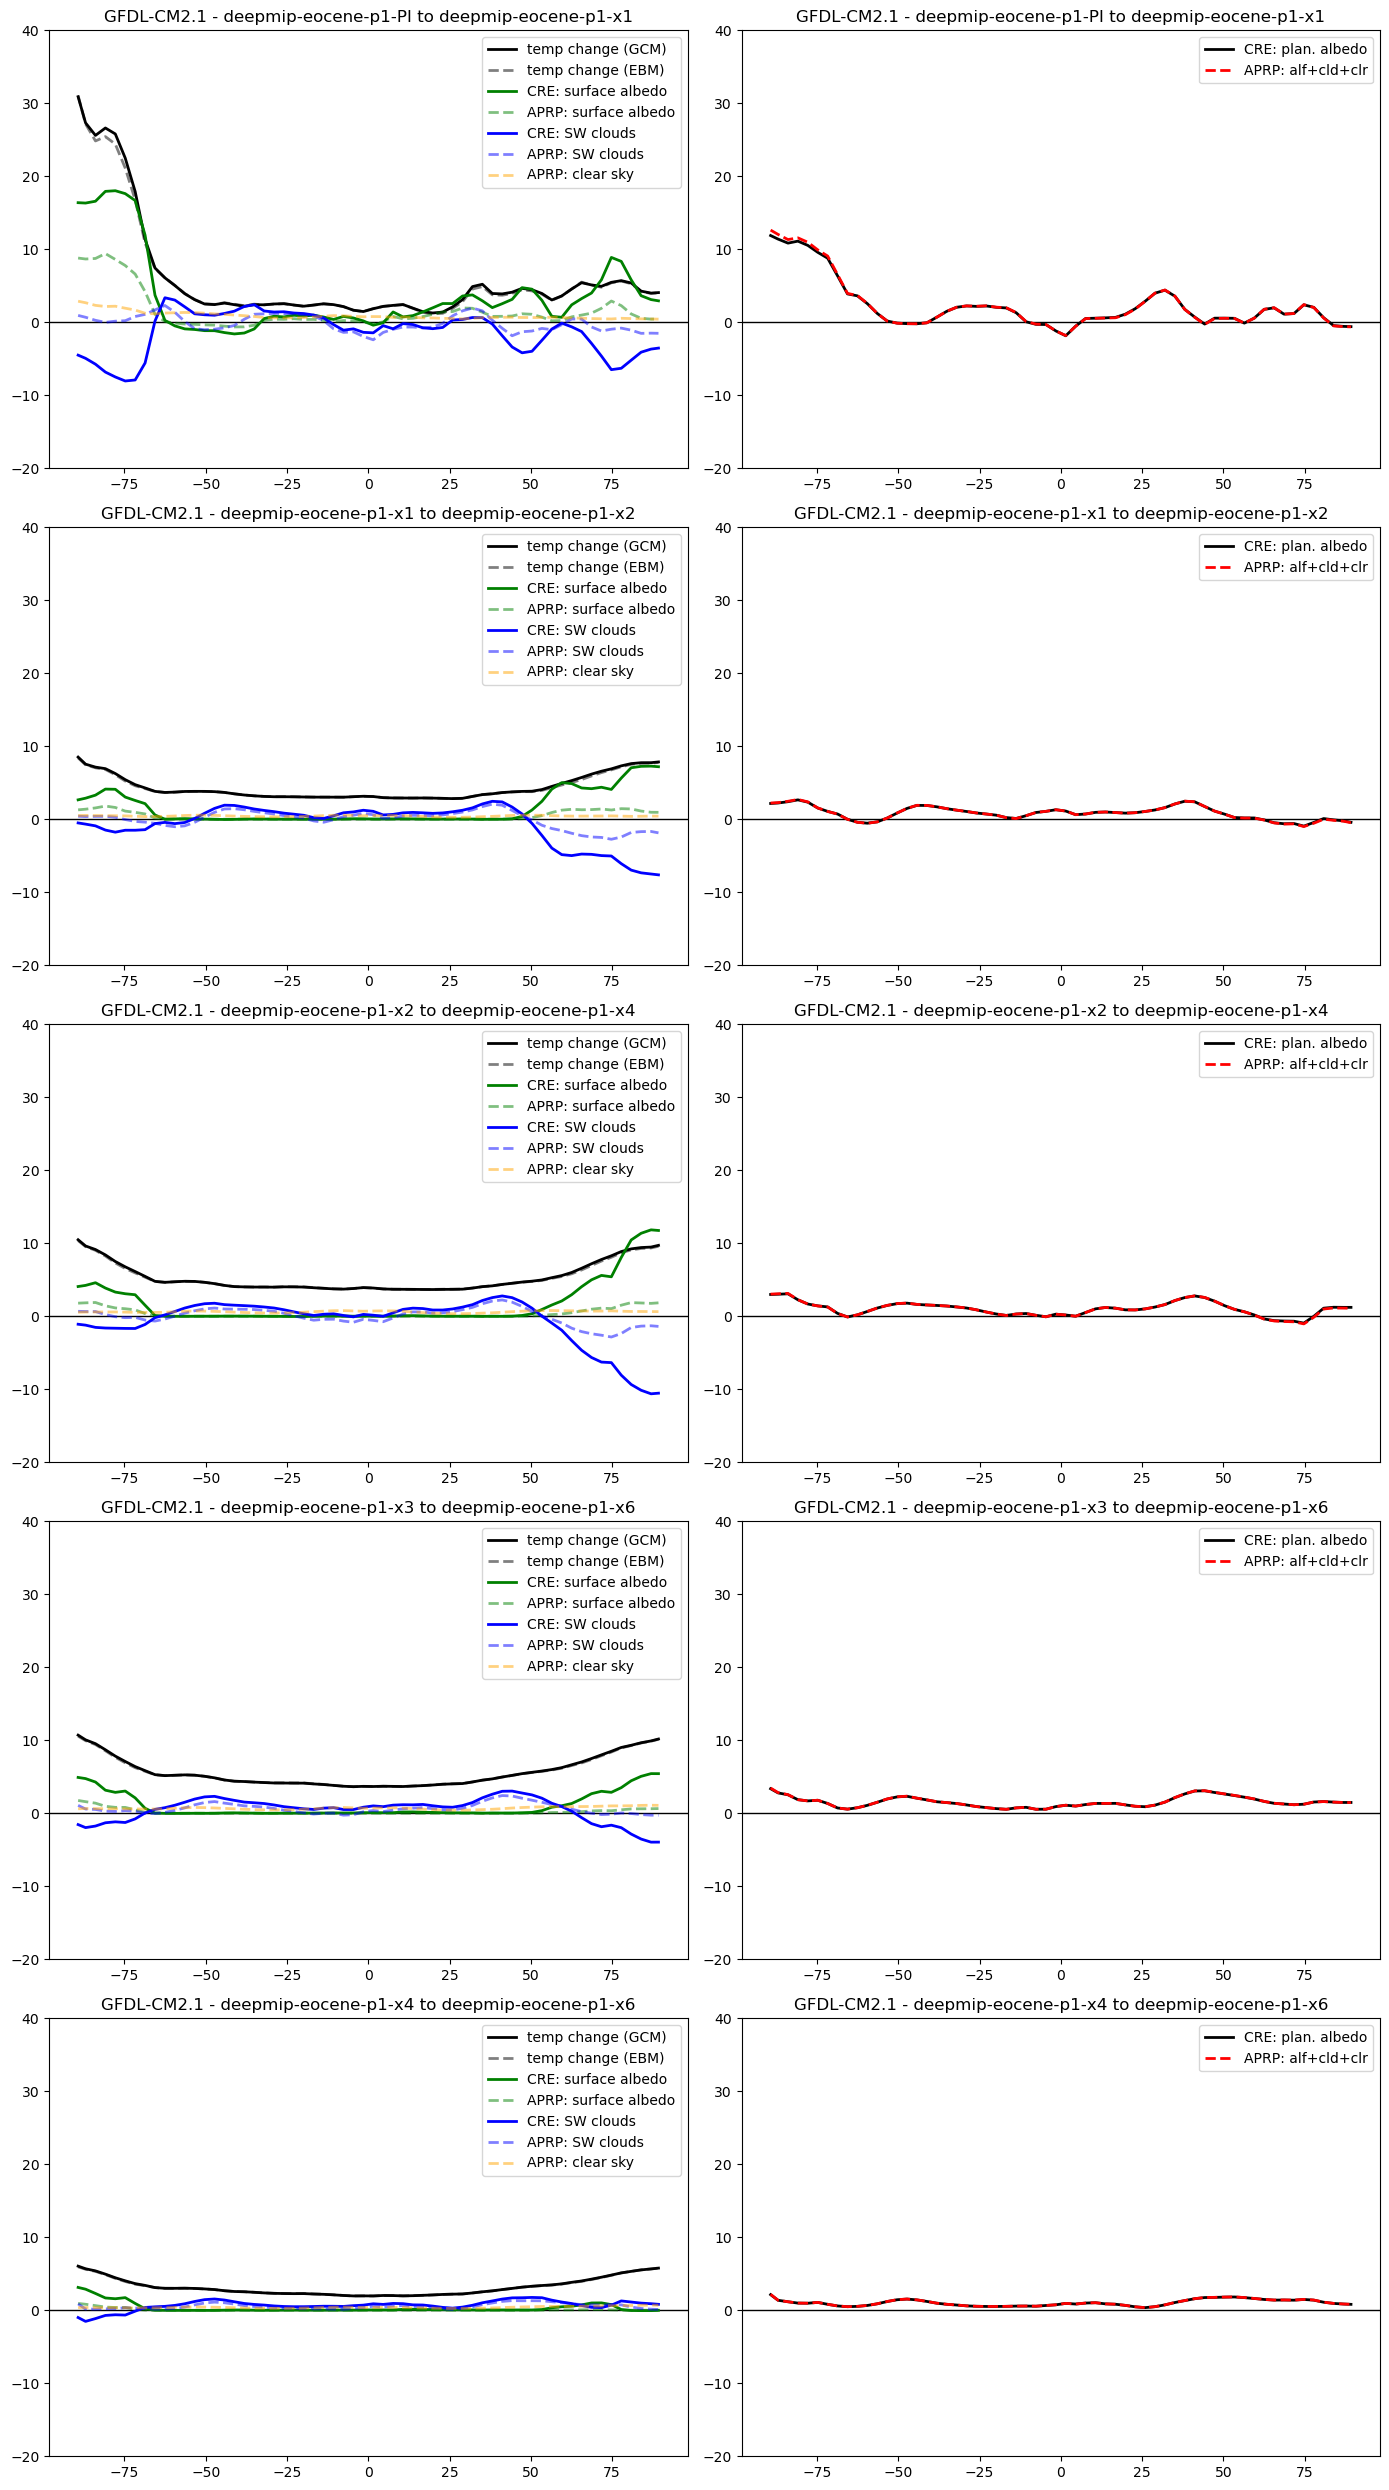

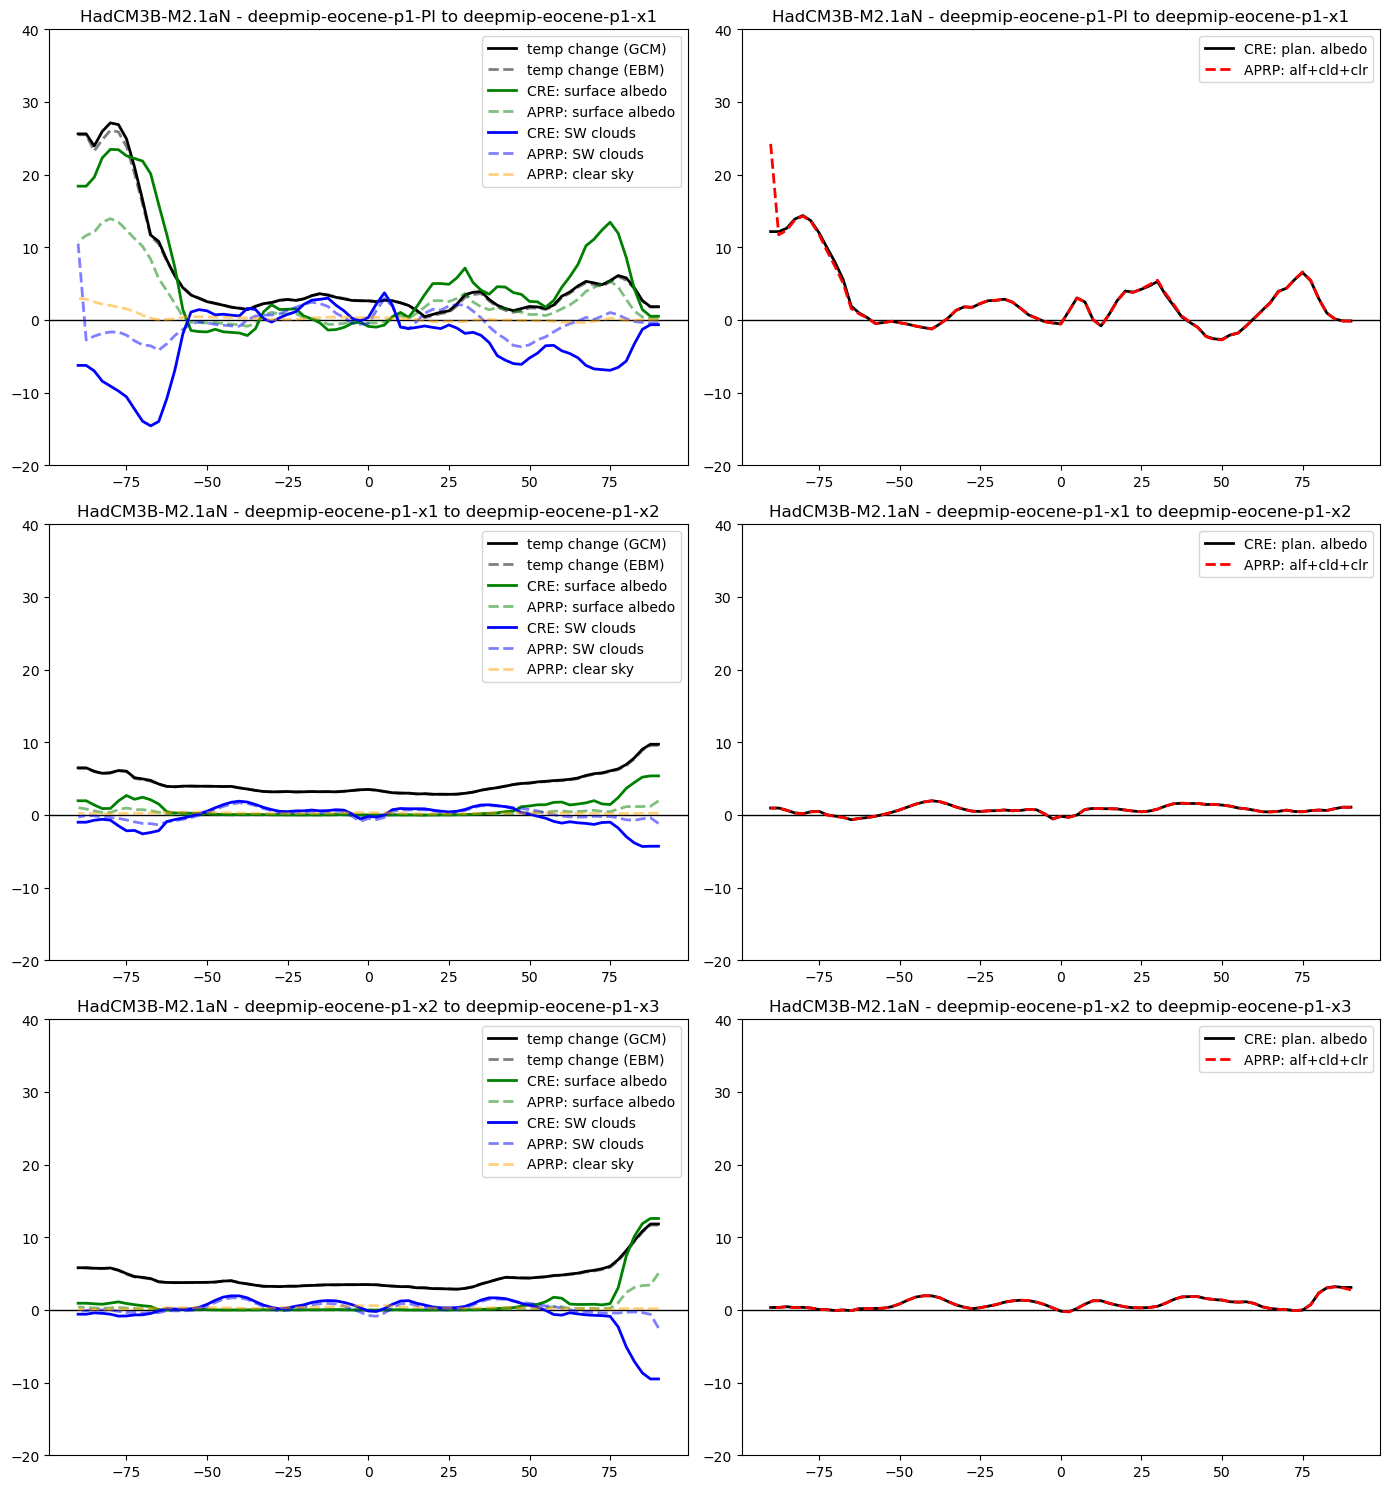

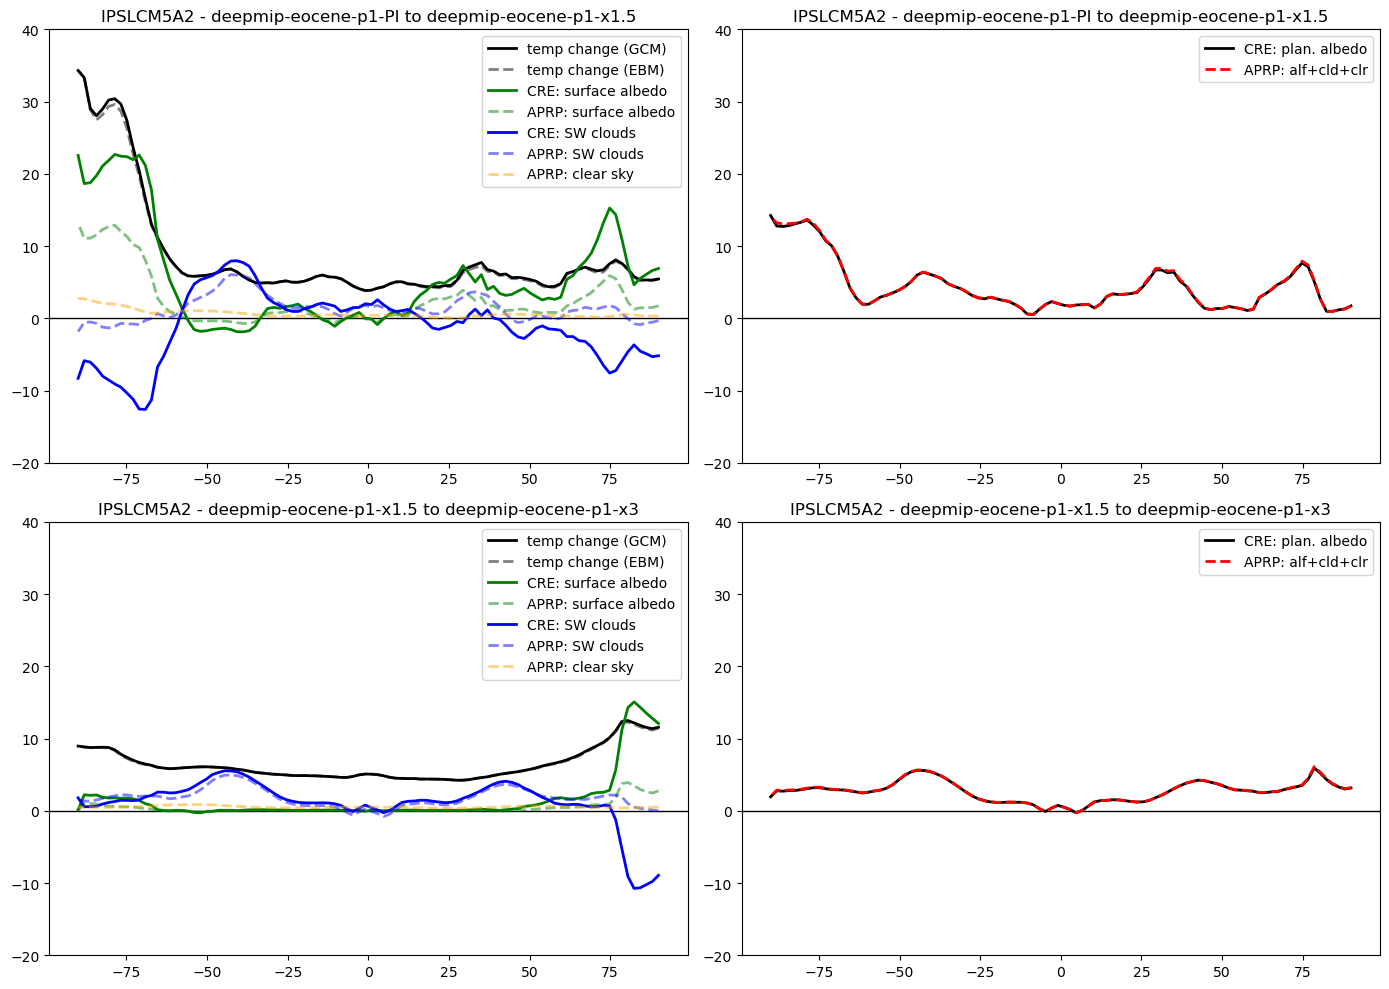

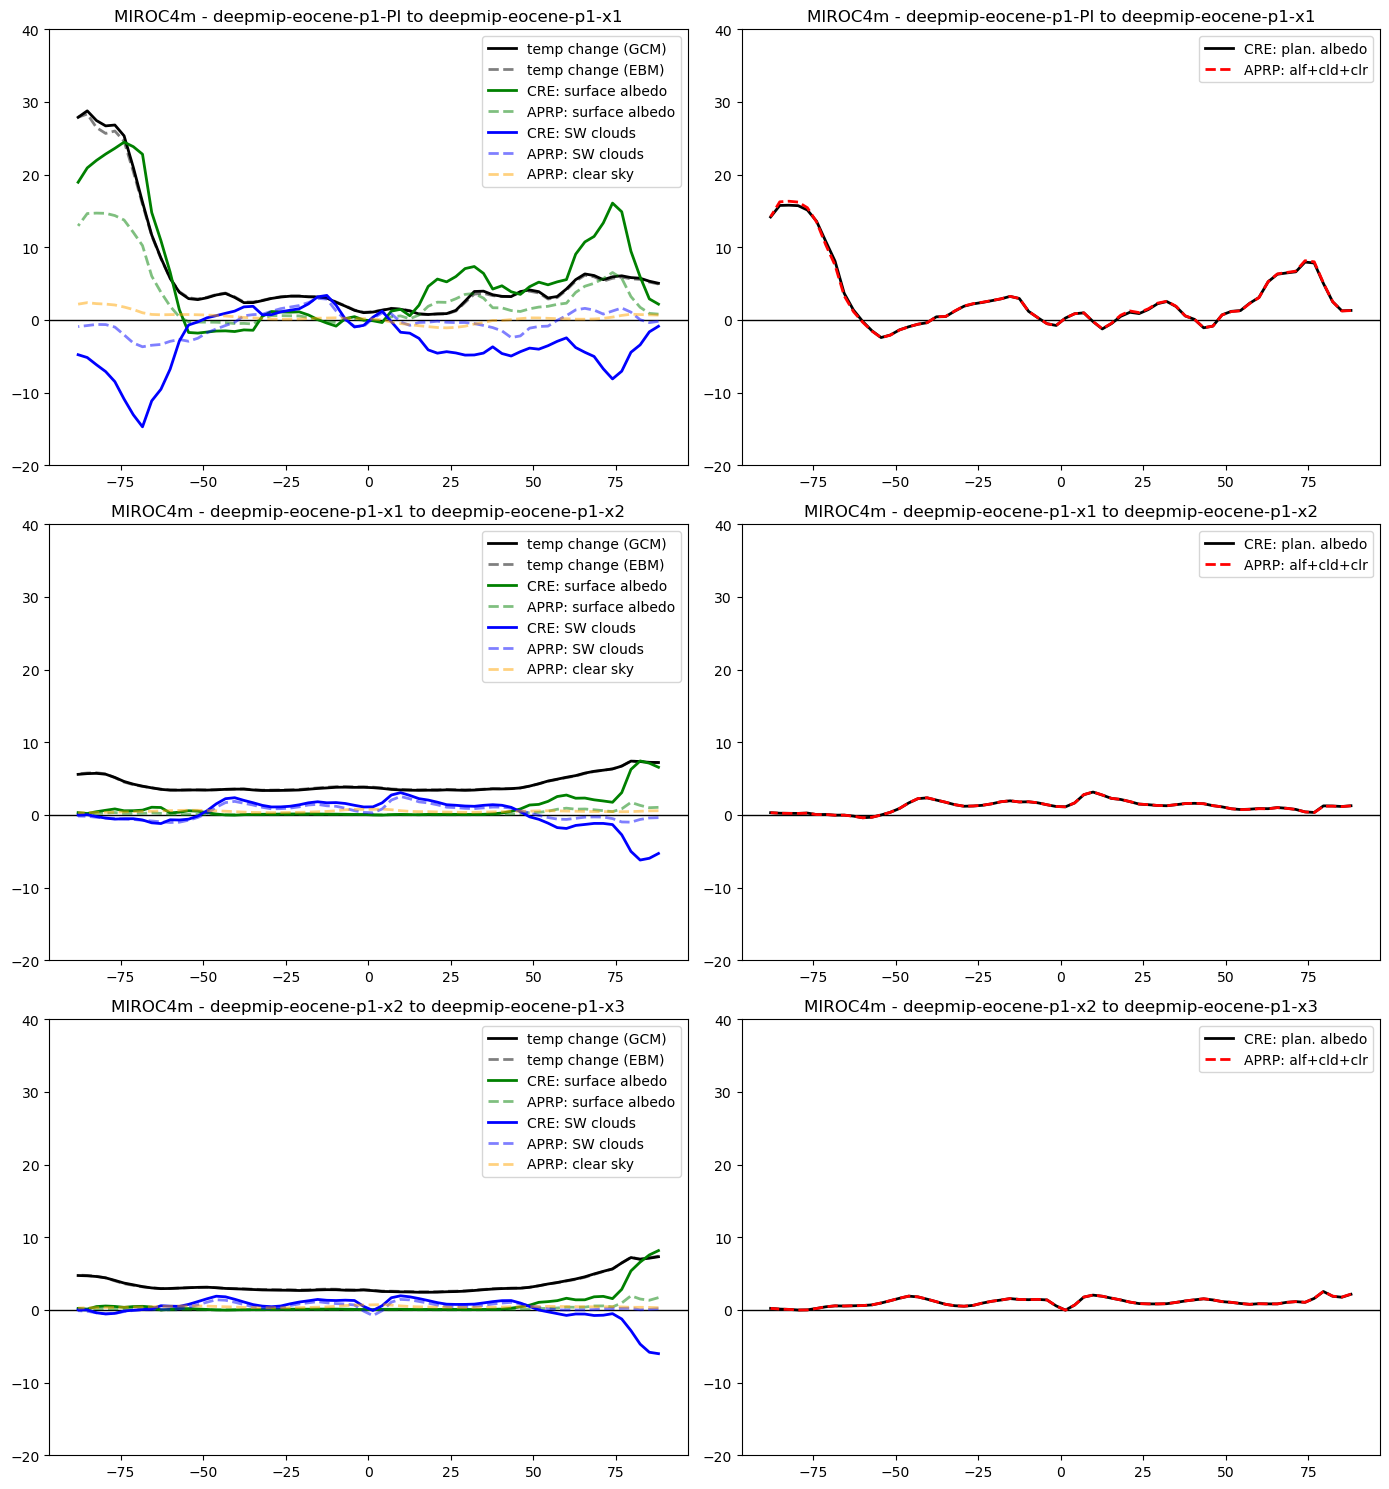

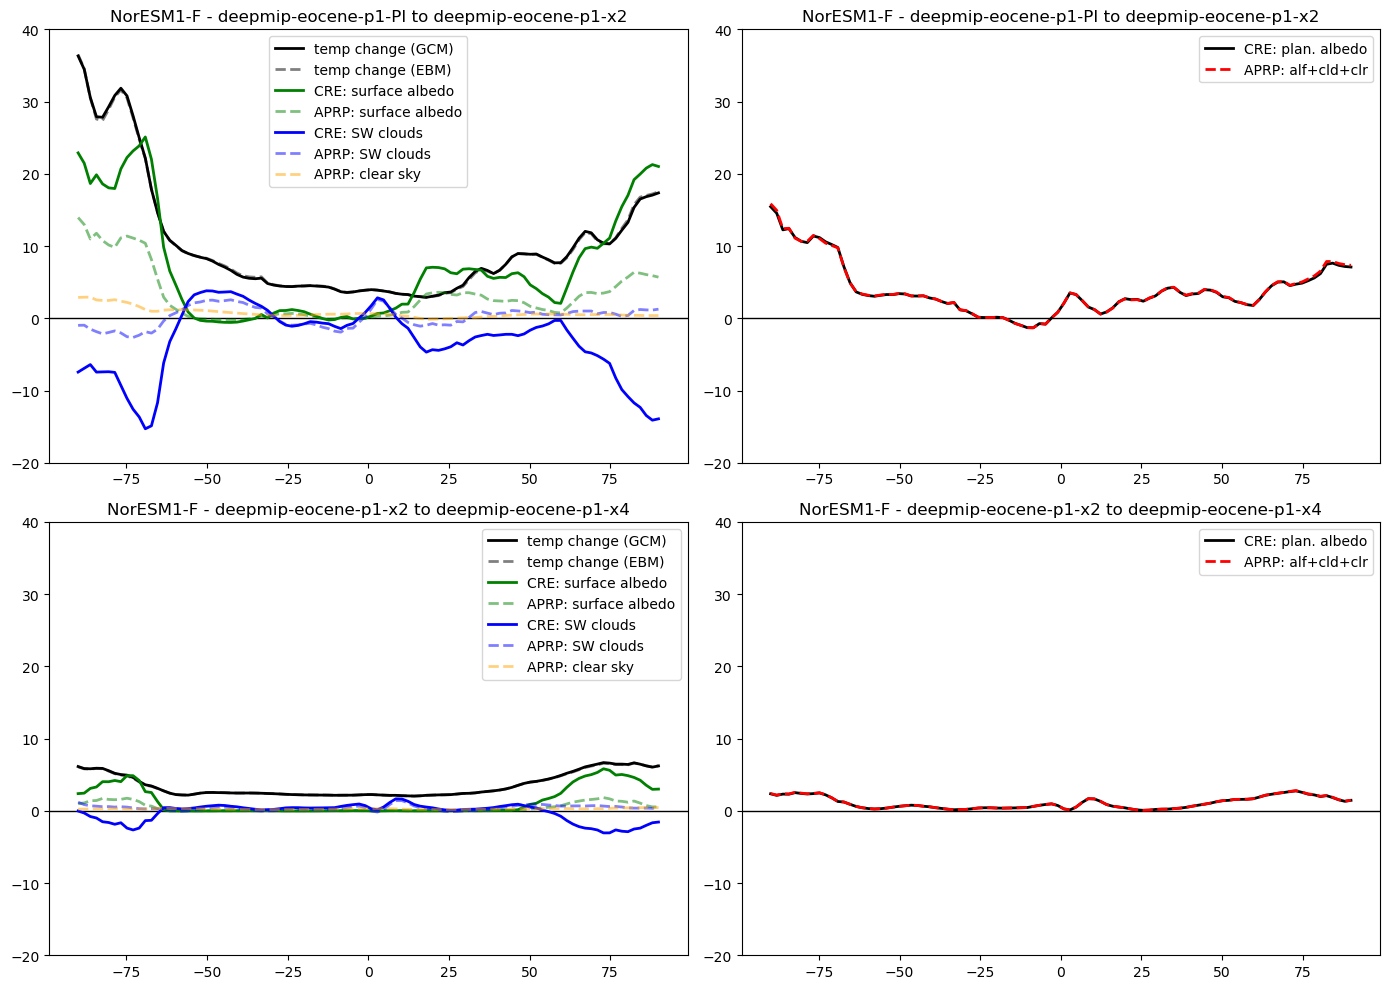

In [39]:
# import EBM results
for model in deepmip_dict.keys():
    ncases = deepmip_dict[model]['ncase'] - 1
    # create figure
    fig, axs = plt.subplots(ncases, 2, figsize=(14, 5 * ncases))
    for i in range(ncases):

        ebm_file = model + '.' + deepmip_dict[model]['contr'][i] +'.to.' + deepmip_dict[model]['sensi'][i] + '.ebm.nc'
        ebm      = xr.open_dataset(data_dir + '/deepmip/' + ebm_file, decode_times=False)
        ebm_ym   = ebm.mean('time')

        # plot total change
        axs[i,0].plot(ebm_ym['lat'], ebm_ym['dt_gcm'], label='temp change (GCM)', linewidth=2, color='black', linestyle='solid')
        axs[i,0].plot(ebm_ym['lat'], ebm_ym['dt_ebm'], label='temp change (EBM)', linewidth=2, alpha=0.5, color='black', linestyle='dashed')

        # plot surface albedo
        axs[i,0].plot(ebm_ym['lat'], ebm_ym['dt_salb'], label='CRE: surface albedo', linewidth=2, color='green', linestyle='solid')
        axs[i,0].plot(ebm_ym['lat'], ebm_ym['dt_aprp_alf'], label='APRP: surface albedo', linewidth=2, color='green', alpha=0.5, linestyle='dashed')

        # plot cloud feedbacks
        axs[i,0].plot(ebm_ym['lat'], ebm_ym['dt_swcre'], label='CRE: SW clouds', linewidth=2, color='blue', linestyle='solid')
        axs[i,0].plot(ebm_ym['lat'], ebm_ym['dt_aprp_cld'], label='APRP: SW clouds', linewidth=2, color='blue', alpha=0.5, linestyle='dashed')

        # plot clear sky feedbacks
        axs[i,0].plot(ebm_ym['lat'], ebm_ym['dt_aprp_clr'], label='APRP: clear sky', linewidth=2, color='orange', alpha=0.5, linestyle='dashed')

        axs[i,1].plot(ebm_ym['lat'], ebm_ym['dt_palb'], label='CRE: plan. albedo', color='black', linestyle='solid', linewidth=2)
        axs[i,1].plot(ebm_ym['lat'], ebm_ym['dt_aprp_alf'] + ebm_ym['dt_aprp_cld'] + ebm_ym['dt_aprp_clr'], label='APRP: alf+cld+clr', color='red', linestyle='dashed', linewidth=2)

        for p in range(2):
            axs[i,p].set_title(f"{model} - {deepmip_dict[model]['contr'][i]} to {deepmip_dict[model]['sensi'][i]}")
            axs[i,p].axhline(y=0, color='black', linestyle='-', linewidth=1, zorder=0)
            axs[i,p].set_ylim([-20, 40])  
            axs[i,p].legend()


    plt.tight_layout()
    # plt.savefig(f"{model}_plots.pdf")  # Save each model's plots as a PDF
    # plt.close()